# This is a simulation for a simple harmonic oscillator in imaginary time with path integral

March 8, 2016 Yuping Huang

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import harmonic
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

Initialize the MCMC simulations for different inverse temperatures $\zeta=\beta\hbar\omega$ at 0.01, 0.1, 1.0 and 10.0. As hidden in harmonic.py, the simulation starts at x=0 and ends at x=0 so that we can probe the statistical property of the ground state. 80 imaginary time slices are used to generate 100000 paths

In [2]:
h1,h2,h3,h4 = (harmonic.harmonic(0.01),harmonic.harmonic(0.1),harmonic.harmonic(1),harmonic.harmonic(10))

Do the simulation

In [3]:
results=[None,None,None,None]
results[0],results[1],results[2],results[3] = (h1.generatePaths(),h2.generatePaths(),
                                               h3.generatePaths(),h4.generatePaths())

Throw away the first $BURNOFF points for the MCMC for it to converge

In [4]:
BURNOFF = 9999

Now plot the graph for each simulation, 100000-BURNOFF paths, each with 80 slices in imaginary time, are plotted. Note the zeta(inverse temperature) number and the y-axis scales. The classical limits are quite remarkable

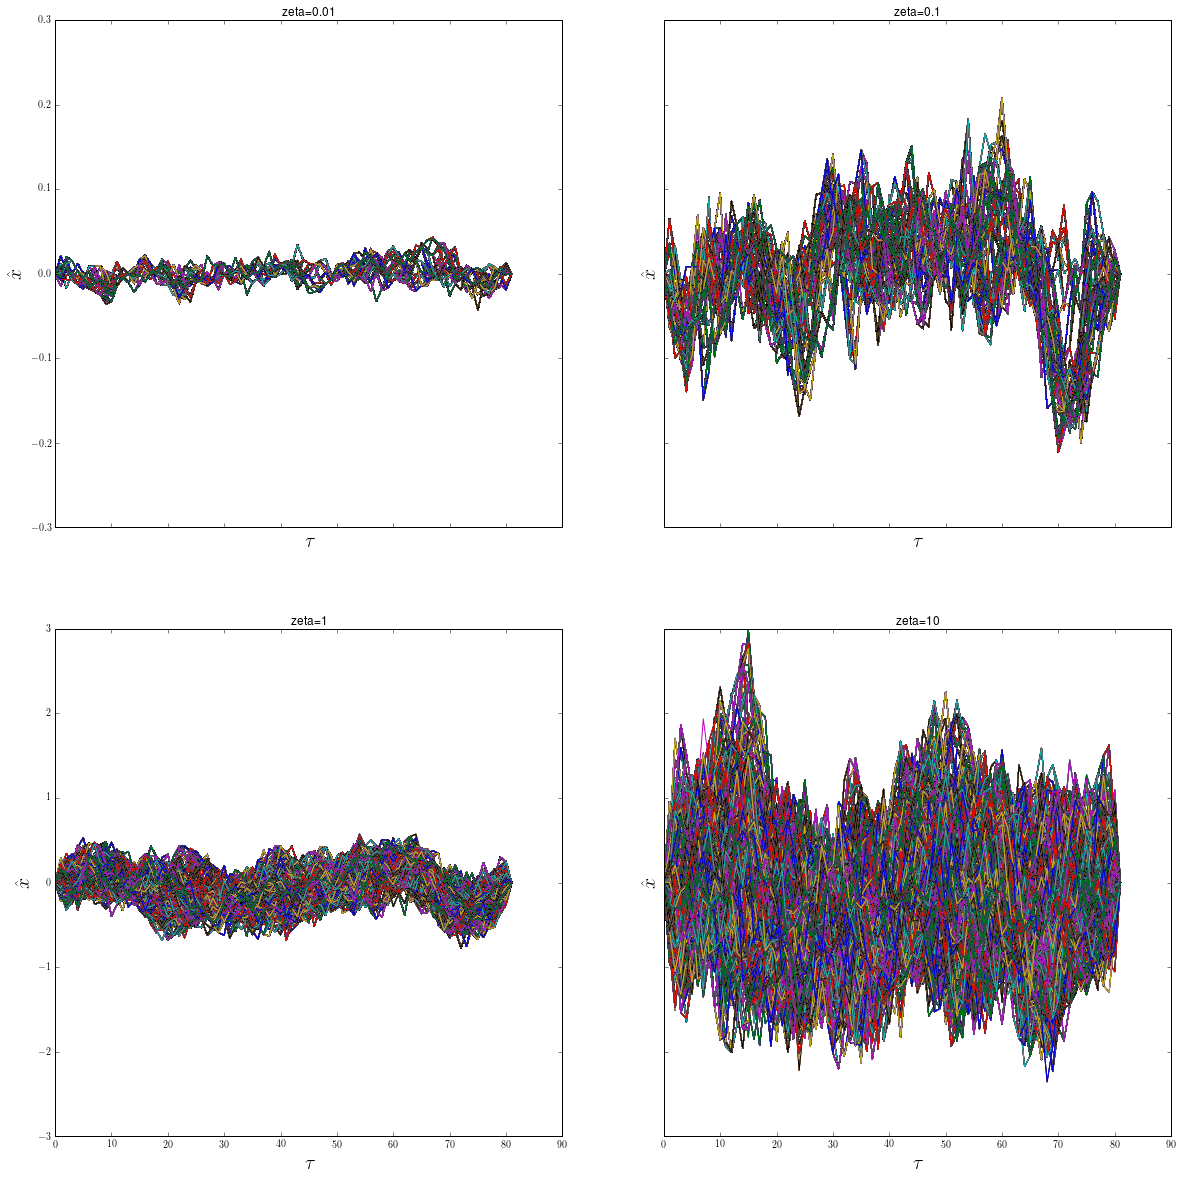

In [5]:
f, ax = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20,20))
i=BURNOFF
ax[0][0].set_title("zeta=0.01")
ax[0][1].set_title("zeta=0.1")
ax[1][0].set_title("zeta=1")
ax[1][1].set_title("zeta=10")
i=0
for row in ax:
    for a in row:
        a.set_xlabel(r'$\tau$',fontsize=20)
        a.set_ylabel(r'$\hat{x}$',fontsize=20)
        result=results[i][BURNOFF:,:]
        a.plot(np.transpose(result))
        i+=1

# (Pseudo) wave function for each simulation

See write-up, a histogram in x space may give one the wave function mod square for a stationary particle at the center of the well. This is more probable at low temperature since the high energy states are exponentially suppressed. Also at really low temperature, the particle is more likely to be found in the ground state than a non-stationary one which would render this effort useless

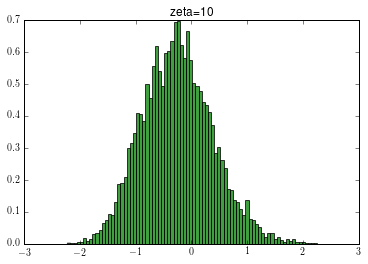

In [6]:
n, bins, patches = plt.hist(results[3][BURNOFF:,20:-20].flatten(), 80, normed=1,stacked=1, facecolor='green', alpha=0.75)
plt.title(r'zeta=10')

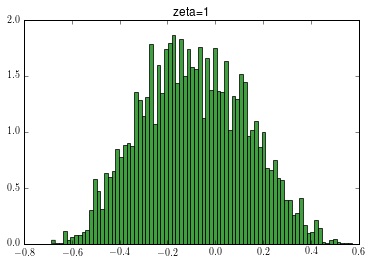

In [7]:
n, bins, patches = plt.hist(results[2][BURNOFF:,20:-20].flatten(), 80, normed=1,stacked=1, facecolor='green', alpha=0.75)
plt.title(r'zeta=1')

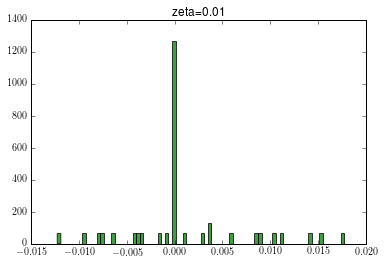

In [8]:
n, bins, patches = plt.hist(results[0][BURNOFF,20:-20].flatten(), 80,  normed=1,stacked=1,  facecolor='green', alpha=0.75)
plt.title('zeta=0.01')

The classical limit at high temperature is extremely pronounced here. Note that I took out the first 20 and last 20 points in the path such that the results are LESS biased by the choice of start and end point. I could have randomly choose the end point but I ran out of time.

# Attempt to find ground state energy

Virial theorem: $E=\mu<x^2>$ . In this case $\mu=1$. We hope(assume) that the $\zeta=10$ case is a limiting the particle at ground state

Here is supposingly the $E_0$, it is supposed to be 0.5

In [9]:
np.mean(np.mean(np.square(results[3][BURNOFF:,20:-20]),axis=1))

0.45910250121866397

And its uncertainty and histogram

In [10]:
np.std(np.mean(np.square(results[3][BURNOFF:,20:-20]),axis=1))

0.23147985352456399

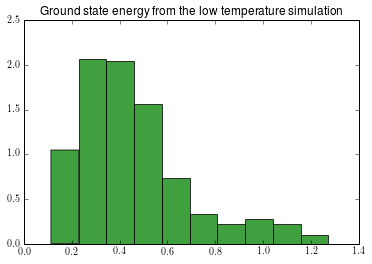

In [11]:
plt.hist(np.mean(np.square(results[3][BURNOFF:,20:-20]),axis=1),normed=1,stacked=0,
                          facecolor='green',alpha=0.75)
plt.title('Ground state energy from the low temperature simulation')

This is a dubious measurement. The number looks right but really the discretization is too much to simulate the continuous limit. I don't really have time to do more slices since it would requires more fine-tuning the transition function such that thermo equilibrium is reached.